In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections.abc import Callable

Util-функции

In [2]:
def create_plot(x, y_arrays, x_label, y_label, func_labels=None, colors=None, xPi=False,
                base=np.pi, marker=[None], linestyle=["-"], markersize=[10], linewidth=[1], markevery=None):
  fig, ax = plt.subplots()

  if markevery is None:
    markevery = [1] * len(y_arrays)

  if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * (len(y_arrays) // 7 + 1)

  if type(x[0]) == list:
    for i, y in enumerate(y_arrays):
      if func_labels is not None:
        ax.plot(x[i], y, color=colors[i], linestyle=linestyle[i], marker=marker[i], markersize=markersize[i],
                linewidth=linewidth[i], label=func_labels[i], markevery=markevery[i])
        ax.legend()
      else:
        ax.plot(x[i], y, color=colors[i], linestyle=linestyle[i], marker=marker[i], markersize=markersize[i],
                linewidth=linewidth[i], markevery=markevery[i])
  else:
    for i, y in enumerate(y_arrays):
      if func_labels is not None:
        ax.plot(x, y, color=colors[i], linestyle=linestyle[i], marker=marker[i], markersize=markersize[i],
                linewidth=linewidth[i], label=func_labels[i], markevery=markevery[i])
        ax.legend()
      else:
        ax.plot(x, y, color=colors[i], linestyle=linestyle[i], marker=marker[i], markersize=markersize[i],
              linewidth=linewidth[i], markevery=markevery[i])

  ax.grid(True)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

  if xPi:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=base))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(
      lambda val, pos: f'{int(val/np.pi)}π' if val % np.pi == 0 and val != 0 else
                    (f'{val/np.pi:.1f}π' if val != 0 else '0')
    ))

  return ax

def draw_subplots(axes_list, nrows=1, ncols=None, height=4, width=7):
  num_plots = len(axes_list)
  if ncols is None:
      ncols = (num_plots + nrows - 1) // nrows

  fig, axes = plt.subplots(nrows, ncols, figsize=(width * ncols, height * nrows))
  axes = np.array(axes).reshape(-1)

  for i, ax in enumerate(axes_list):
    for line in ax.get_lines():
      axes[i].plot(line.get_xdata(), line.get_ydata(), color=line.get_color(),
                   linestyle=line.get_linestyle(), marker=line.get_marker(),
                   markersize=line.get_markersize(), linewidth=line.get_linewidth(),
                   label=line.get_label())
    if ax.get_legend() is not None:
      axes[i].legend()
    axes[i].set_xlabel(ax.get_xlabel())
    axes[i].set_ylabel(ax.get_ylabel())
    axes[i].grid(True)

    if ax.xaxis.get_major_formatter() is not None:
      axes[i].xaxis.set_major_locator(ax.xaxis.get_major_locator())
      axes[i].xaxis.set_major_formatter(ax.xaxis.get_major_formatter())

  for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

<>:55: SyntaxWarning: invalid escape sequence '\p'
<>:62: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:66: SyntaxWarning: invalid escape sequence '\h'
<>:55: SyntaxWarning: invalid escape sequence '\p'
<>:62: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:66: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_5918/2371386312.py:55: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(x=b, color='red', linestyle='--', alpha=0.5, label='$t = \pm b$')
/tmp/ipykernel_5918/2371386312.py:62: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(v, np.real(f_hat), label='Re[$\hat{f}(v)$]', color='blue')
/tmp/ipykernel_5918/2371386312.py:63: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(v, np.imag(f_hat), label='Im[$\hat{f}(v)$]', color='red')
/tmp/ipykernel_5918/2371386312.py:66: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Действительная и мнимая части $\

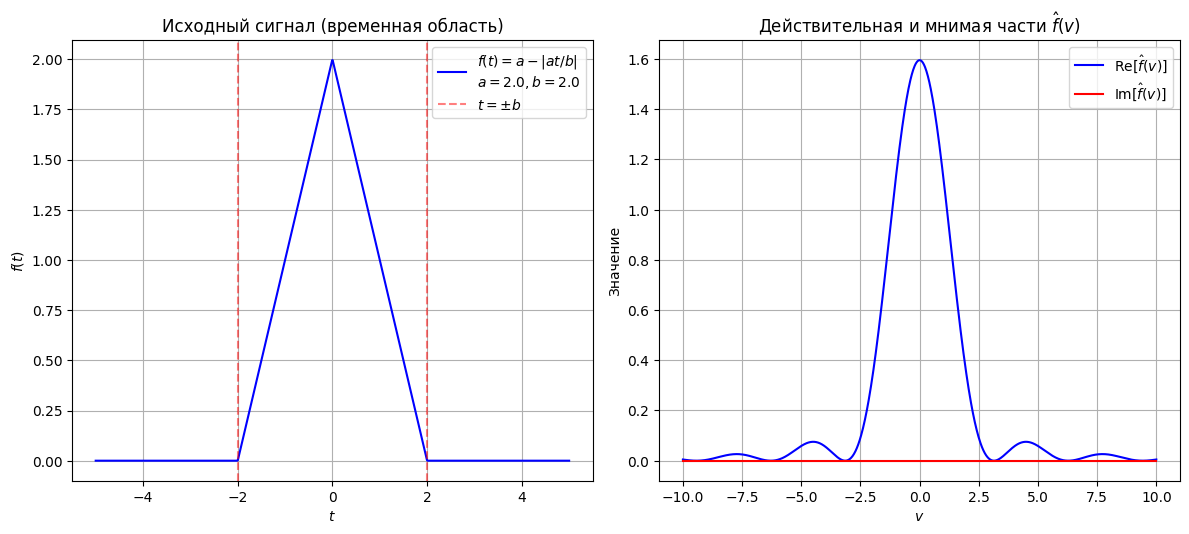

In [6]:


def f(t, a, b):
    """Исходный сигнал f(t)."""
    return np.where(np.abs(t) <= b, a - np.abs(a * t / b), 0)

def fourier_transform(omega, a, b):
    """
    Вычисляет значение преобразования Фурье по формуле:
    (2*sqrt(2)*a*sin^2(omega*b/2)) / (omega^2*b*sqrt(pi))
    
    Параметры:
    omega : float или np.ndarray
        Частота (может быть массивом значений)
    a : float
        Амплитуда сигнала
    b : float
        Параметр ширины сигнала
    
    Возвращает:
    float или np.ndarray
        Значения преобразования Фурье для заданных omega
    """
    numerator = 2 * np.sqrt(2) * a * np.sin(omega * b / 2)**2
    denominator = omega**2 * b * np.sqrt(np.pi)
    
    # Обработка случая omega=0 (предел при omega→0)
    if isinstance(omega, (float, int)):
        if np.isclose(omega, 0):
            return a * b / np.sqrt(2 * np.pi)  # Предельное значение
    else:
        denominator[omega == 0] = np.inf  # Избегаем деления на 0
    
    return numerator / denominator
# Параметры сигнала
a = 2.0
b = 2.0

# Временной диапазон для f(t)
t = np.linspace(-5, 5, 1000)
signal = f(t, a, b)

# Частотный диапазон для F(v) (исключаем v=0)
v = np.linspace(-10, 10, 1000)
v = v[np.abs(v) > 1e-6]  # Убираем v=0, чтобы избежать деления на ноль
f_hat = fourier_transform(v, a, b)

# Создаём фигуру с 2 рядами графиков
plt.figure(figsize=(12, 10))

# График исходного сигнала f(t)
plt.subplot(2, 2, 1)
plt.plot(t, signal, label=f'$f(t) = a - |a t / b|$\n$a={a}, b={b}$', color='blue')
plt.xlabel('$t$')
plt.ylabel('$f(t)$')
plt.title('Исходный сигнал (временная область)')
plt.axvline(x=b, color='red', linestyle='--', alpha=0.5, label='$t = \pm b$')
plt.axvline(x=-b, color='red', linestyle='--', alpha=0.5)
plt.grid(True)
plt.legend()

# Действительная и мнимая части F(v)
plt.subplot(2, 2, 2)
plt.plot(v, np.real(f_hat), label='Re[$\hat{f}(v)$]', color='blue')
plt.plot(v, np.imag(f_hat), label='Im[$\hat{f}(v)$]', color='red')
plt.xlabel('$v$')
plt.ylabel('Значение')
plt.title('Действительная и мнимая части $\hat{f}(v)$')
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()